# Web Scrapper

In [1]:
# importaciones
from selenium import webdriver
# se necesita selenium porque la informacion de la pagina es dinamica y no se puede acceder directo con el html
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
# Libreria de Web Scraping
from bs4 import BeautifulSoup
# Libreria de Data Frames
import pandas as pd
import numpy as np

In [2]:
# Se crea una lista vacía para almacenar los datos
data = []
for i in range(1,11):
    # para hacer todos los urls a la vez
    url = 'https://ignaciomsarmiento.github.io/GEIH2018_sample/page'+str(i)+'.html'
    # se inicializa el driver
    driver = webdriver.Chrome()
    # se usa el url en el driver
    driver.get(url)
    # como es una pagina web con informacion dinámica hay que esperar que la tabla cargue
    wait = WebDriverWait(driver, 10)
    table = wait.until(EC.presence_of_element_located((By.XPATH, '//table')))
    # Ahora si se puede utilzar Beautiful Soup que se usaria para paginas web estaticas
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    # Ahora si esta disponible el tag <table> que no estaría disponible sin Selenium
    tabla_html = soup.find('table')
    # Se cierra el navegador
    driver.quit()
    # Ahora se va a convertir en una tabla de Pandas
    # Se obtienen las filas de la tabla
    filas = tabla_html.find_all('tr')
    # Se itera a traves de las filas para obtener los datos de cada celda
    for fila in filas:
        # Suponiendo que los datos están en las celdas <td>
        fila_data = [celda.text.strip() for celda in fila.find_all('td')]  # Obtener el texto de cada celda y limpiarlo
        data.append(fila_data)
    print('Se ha scrapeado el Data Chunk #'+str(i)+'--URL: '+url)
# Se crea un Data frame pero se deja por fuera del loop para que los datos de todas las paginas queden en la misma lista y luego solo se convierta una vez en DataFrame
df = pd.DataFrame(data)
# Se agregan los encabezados que estan en <th>
encabezados = [encabezado.text.strip() for encabezado in filas[0].find_all('th')]
df.columns = encabezados
# Se quita la primera fila que quedo con None
df = df.drop(0, axis=0)
print('El Data Frame esta listo, hay: '+str(len(df))+ ' observaciones' )

    



Se ha scrapeado el Data Chunk #1--URL: https://ignaciomsarmiento.github.io/GEIH2018_sample/page1.html
Se ha scrapeado el Data Chunk #2--URL: https://ignaciomsarmiento.github.io/GEIH2018_sample/page2.html
Se ha scrapeado el Data Chunk #3--URL: https://ignaciomsarmiento.github.io/GEIH2018_sample/page3.html
Se ha scrapeado el Data Chunk #4--URL: https://ignaciomsarmiento.github.io/GEIH2018_sample/page4.html
Se ha scrapeado el Data Chunk #5--URL: https://ignaciomsarmiento.github.io/GEIH2018_sample/page5.html
Se ha scrapeado el Data Chunk #6--URL: https://ignaciomsarmiento.github.io/GEIH2018_sample/page6.html
Se ha scrapeado el Data Chunk #7--URL: https://ignaciomsarmiento.github.io/GEIH2018_sample/page7.html
Se ha scrapeado el Data Chunk #8--URL: https://ignaciomsarmiento.github.io/GEIH2018_sample/page8.html
Se ha scrapeado el Data Chunk #9--URL: https://ignaciomsarmiento.github.io/GEIH2018_sample/page9.html
Se ha scrapeado el Data Chunk #10--URL: https://ignaciomsarmiento.github.io/GEIH20

# Limpieza de datos

In [31]:
# se eliminan los valores nulos
# se dejan solo las variables que se van a necesitar en el taller
df_2_3 = df[['y_salary_m','age','sex','maxEducLevel']]
df_2_3.columns = ['Salario','Edad','Genero','Educacion']

In [32]:
# se dejan solo los valores que son diferentes de 'NA'
# Los NA quedan como NaN y por ende se pueden borrar mediante pandas
df_2_3 = df_2_3[df_2_3!='NA'].astype(float)
#Aca se borran los NAN y se cambia el tipo de object a Float para poder hacer modelos y operaciones
df_2_3 = df_2_3[df_2_3['Edad']>=18].dropna()

print('Despues de la limpieza quedan '+str(len(df_2_3))+' observaciones')

Despues de la limpieza quedan 9891 observaciones


In [6]:
df_2_3.head(5)

,Salario,Edad,Genero,Educacion
2,1300000.0,36.0,1.0,6.0
9,1200000.0,51.0,1.0,7.0
14,737717.0,45.0,1.0,4.0
16,700000.0,61.0,1.0,3.0
22,1700000.0,35.0,0.0,7.0


# Estadisticas descriptivas

## General

In [33]:
descrip = df_2_3.describe()
descrip

,Salario,Edad,Genero,Educacion
count,9.891000e+03,9891.000000,9891.000000,9891.000000
mean,1.556278e+06,36.238904,0.502679,6.098170
std,2.148850e+06,12.024984,0.500018,1.106268
min,1.000000e+04,18.000000,0.000000,1.000000
25%,7.812420e+05,26.000000,0.000000,6.000000
50%,9.000000e+05,34.000000,1.000000,6.000000
75%,1.500000e+06,45.000000,1.000000,7.000000
max,3.400000e+07,86.000000,1.000000,7.000000


# Por edad

In [34]:
rango=[]
for i in df_2_3['Edad']:
    for j in range(1,11):
        izquierda = j*10
        derecha = (j+1)*10
        if izquierda < i <= derecha:
            rango.append(str(j*10)+'-'+str((j+1)*10))        
df_2_3['Rango Edad'] = rango    

In [9]:
df_edad = df_2_3.groupby('Rango Edad').mean()

In [10]:
df_edad

,Salario,Edad,Genero,Educacion
Rango Edad,,,,
10-20,7.167348e+05,19.265421,0.517757,6.271028
20-30,1.205153e+06,25.641414,0.528223,6.407308
30-40,1.743733e+06,35.257334,0.496101,6.216487
40-50,1.904862e+06,45.255462,0.463866,5.842577
50-60,1.891624e+06,54.838655,0.489076,5.554622
60-70,1.946478e+06,63.575862,0.531034,5.113793
70-80,1.375452e+06,73.607143,0.535714,4.214286
80-90,7.678105e+05,84.500000,0.500000,3.500000


# Por genero

In [11]:
df_g = df_2_3.iloc[:,:4].groupby('Genero').mean().rename(index={0:'Femenino',1:'Masculino'})
df_g

,Salario,Edad,Educacion
Genero,,,
Femenino,1.472704e+06,36.577353,6.186623
Masculino,1.638961e+06,35.904063,6.010660


In [12]:
# POr años de educacion
df_ed = df_2_3.iloc[:,:4].groupby('Educacion').mean()
df_ed

,Salario,Edad,Genero
Educacion,,,
1.0,6.389703e+05,49.044444,0.400000
3.0,8.077298e+05,47.827160,0.592593
4.0,8.487628e+05,46.867153,0.543066
5.0,8.265039e+05,40.248936,0.576596
6.0,9.342000e+05,34.258848,0.539047
7.0,2.356039e+06,34.315989,0.447745


# Valores Máxuimos

In [13]:
def max_min(lista_columnas_original, data_orginal):
    '''Esta funcion crea un DataFrame con los maximos y minimos de cada columna
    los argumentos son las columnas que quieren sacar los minimos, la base de datos original
    y el nombre de la nueva data set con las estadisticas'''
    nueva_data_set= pd.DataFrame()
    columnas_max_min = lista_columnas_original
    for i in data_orginal[columnas_max_min].columns:
        nueva_data_set=pd.concat([nueva_data_set,data_orginal[data_orginal[i]==data_orginal[i].max()],data_orginal[data_orginal[i]==data_orginal[i].min()]])
    tipo = []
    for i in nueva_data_set[columnas_max_min].columns:
        for j in nueva_data_set[i]:
            if j == data_orginal[i].max():
                tipo.append('Máx '+i)
            elif j == data_orginal[i].min():
                tipo.append('Min '+i)
    nueva_data_set['tipo'] = tipo
                
   
    return nueva_data_set

In [14]:
max_mint = max_min(['Salario','Edad',],df_2_3).iloc[:5,:]

In [15]:
max_mint

,Salario,Edad,Genero,Educacion,Rango Edad,tipo
21229,34000000.0,48.0,1.0,7.0,40-50,Máx Salario
13474,10000.0,22.0,0.0,7.0,20-30,Min Salario
9344,800000.0,86.0,1.0,6.0,80-90,Máx Edad
17586,600000.0,86.0,0.0,4.0,80-90,Máx Edad
189,950000.0,18.0,0.0,7.0,10-20,Min Edad


# Exportar tablas

In [15]:
with pd.ExcelWriter('output.xlsx') as excel_writer:
    descrip.to_excel(excel_writer, sheet_name='Sheet1', index=True)
    df_edad.to_excel(excel_writer, sheet_name='Sheet2', index=True)
    df_g.to_excel(excel_writer, sheet_name='Sheet3', index=True)
    max_mint.to_excel(excel_writer, sheet_name='Sheet4', index=True)

# EDA

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

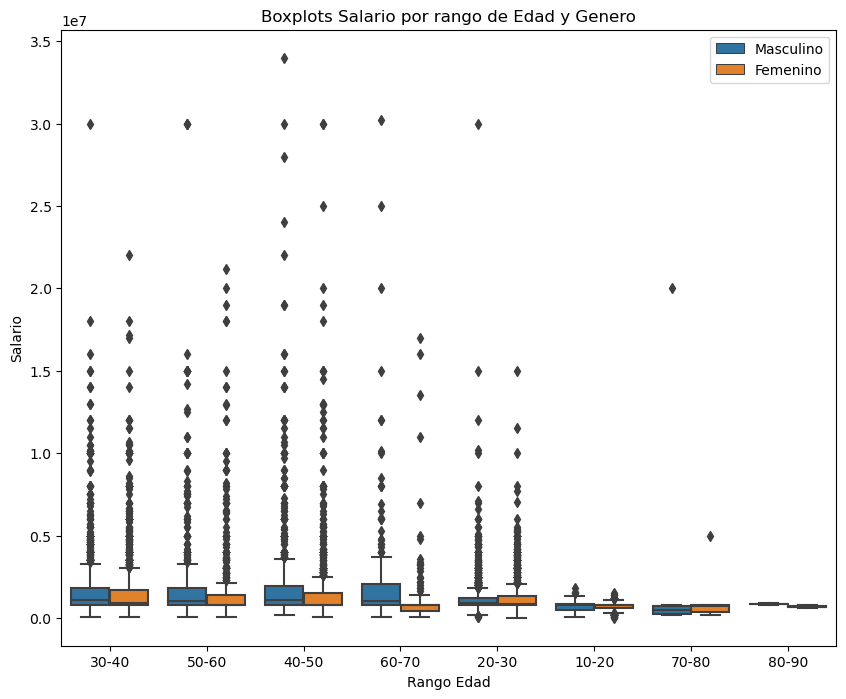

In [17]:
fig = plt.figure(figsize=(10,8))
sns.boxplot(data=df_2_3,y = df_2_3['Salario'], x=df_2_3['Rango Edad'], hue = df_2_3['Genero'].replace({0:'Femenino',1:'Masculino'} ))
plt.title('Boxplots Salario por rango de Edad y Genero')
plt.legend()

<Axes: xlabel='Rango Edad', ylabel='Salario'>

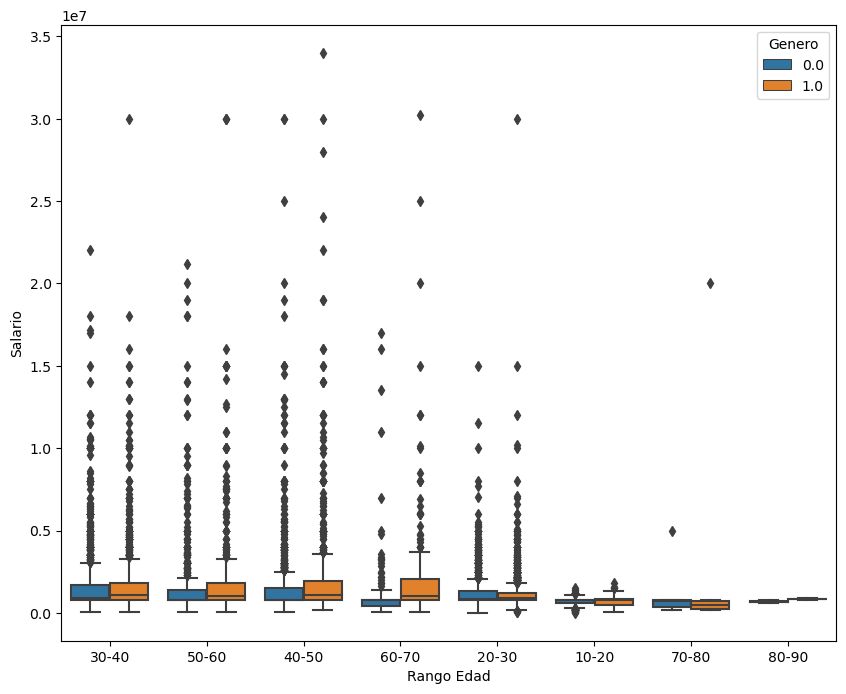

In [18]:
fig = plt.figure(figsize=(10,8))
sns.boxplot(data=df_2_3,y = df_2_3['Salario'], x=df_2_3['Rango Edad'], hue = df_2_3['Genero'] )

# Regresiones de salario-educacion-edad

In [35]:
df_2_3['Edad**2'] = df_2_3['Edad']**2
df_2_3['Edad**3'] = df_2_3['Edad']**3
df_2_3['Educacion**3'] = df_2_3['Educacion']**3
df_2_3['Educacion**2'] = df_2_3['Educacion']**2
df_2_3['Educacion*Edad'] = df_2_3['Educacion']*df_2_3['Edad']
df_2_3['Educacion2*Edad2'] = df_2_3['Educacion**2']*df_2_3['Edad**2']

In [36]:
# se convierte el salario al logaritmo del salario
df_2_3['Salario'] = np.log(df_2_3['Salario']).rename('lnSalario')

In [37]:
df_2_3

,Salario,Edad,Genero,Educacion,Rango Edad,Edad**2,Edad**3,Educacion**3,Educacion**2,Educacion*Edad,Educacion2*Edad2
2,14.077875,36.0,1.0,6.0,30-40,1296.0,46656.0,216.0,36.0,216.0,46656.0
9,13.997832,51.0,1.0,7.0,50-60,2601.0,132651.0,343.0,49.0,357.0,127449.0
14,13.511316,45.0,1.0,4.0,40-50,2025.0,91125.0,64.0,16.0,180.0,32400.0
16,13.458836,61.0,1.0,3.0,60-70,3721.0,226981.0,27.0,9.0,183.0,33489.0
22,14.346139,35.0,0.0,7.0,30-40,1225.0,42875.0,343.0,49.0,245.0,60025.0
...,...,...,...,...,...,...,...,...,...,...,...
32174,13.852806,24.0,1.0,7.0,20-30,576.0,13824.0,343.0,49.0,168.0,28224.0
32176,13.831384,50.0,0.0,6.0,40-50,2500.0,125000.0,216.0,36.0,300.0,90000.0
32181,13.568640,27.0,1.0,6.0,20-30,729.0,19683.0,216.0,36.0,162.0,26244.0
32182,13.710150,24.0,0.0,6.0,20-30,576.0,13824.0,216.0,36.0,144.0,20736.0


In [58]:
from sklearn.linear_model import LinearRegression # para la regresion lineal
from sklearn.model_selection import train_test_split # para la division de la base
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler


In [68]:
def regresion_lineal(X,y):
    # division de la base 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    #normalizacion de X
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    lr = LinearRegression()
    lr.fit(X_train,y_train)
    y_hat = lr.predict(X_test)
    # metricas
    mse = mean_squared_error(y_test,y_hat)
    r2 = r2_score(y_test,y_hat)
    return mse,r2

# primer modelo: Salario = Edad + Genero + Educacion

In [69]:
y = df_2_3.iloc[:,0].values
X = df_2_3.iloc[:,1:4].values

In [70]:
print(regresion_lineal(X,y))
MSE.append(regresion_lineal(X,y))

(0.44670602361907497, 0.2191683586270181)


 # Segundo modelo: Salario = Edad + Genero + Educacion + Edad*Educacion 

In [71]:
y = df_2_3.iloc[:,0].values
columnas = ['Edad','Genero','Educacion','Educacion*Edad']
X = df_2_3[columnas].values


In [72]:
print(regresion_lineal(X,y))
MSE.append(regresion_lineal(X,y))

(0.44267877091698, 0.2262079017970967)


 # Tercer modelo: Salario = Edad + Genero + Educacion + Edad*Educacion + Edad**2 + Educacion**2

In [65]:
y = df_2_3.iloc[:,0].values
columnas = ['Edad','Genero','Educacion','Educacion*Edad','Educacion**2','Edad**2']
X = df_2_3[columnas].values

In [67]:
print(regresion_lineal(X,y))
MSE.append(regresion_lineal(X,y))

(0.39909215901660056, 0.30239627605793384)


 # Cuarto modelo: Salario = Edad + Genero + Educacion + Edad*Educacion + Edad**2 + Educacion**2 + Edad**2*Educacion**2

In [45]:
y = df_2_3.iloc[:,0].values
columnas = ['Edad','Genero','Educacion','Educacion*Edad','Educacion**2','Edad**2','Educacion2*Edad2']
X = df_2_3[columnas].values

In [46]:
print(regresion_lineal(X,y))
MSE.append(regresion_lineal(X,y))

(0.39828589476649523, 0.3038056070373767)


 # Quinto modelo: Salario = Edad + Genero + Educacion + Edad*Educacion + Edad**3 + Educacion**3 

In [47]:
y = df_2_3.iloc[:,0].values
columnas = ['Edad','Genero','Educacion','Educacion*Edad','Educacion**3','Edad**3']
X = df_2_3[columnas].values

In [48]:
print(regresion_lineal(X,y))
MSE.append(regresion_lineal(X,y))

(0.39550689443960113, 0.30866323436249)


In [33]:
print('Los ultimos dos modelos fueron los que mejor desempeño tuvieron')

Los ultimos dos modelos fueron los que mejor desempeño tuvieron


# 5.d

In [34]:
# manera manual de hacer LOOCV muy lento
def LOOCV_regresion_lineal(X,y,base):
    # se importan las librerias
    from sklearn.linear_model import LinearRegression # para la regresion lineal
    from sklearn.model_selection import train_test_split # para la division de la base
    from sklearn.metrics import mean_squared_error # se importa el MSE
    # se crean listas para almacenar resultados
    MSE = [] # en esta se almacenan todos los RMSE
    used = [] # en esta las observaciones que ya se usaron en test
    # se crea el parametro de split tal que quede una solo operacion 
    split = 1/len(base)
    # se crea el objeto del modelo
    lr = LinearRegression()
    # ahora se crea un while loop para hacer el modelo varias vaces
    while len(used) < len(base):
        # se divide la base
        X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=split) # se deja sin random state para que sea aleatorio
        # se hace un condicional para chequear que el dato de test este en la base
        for i in X_test:
            if i not in used: # chequea si no esta en la list de los ya usadoa, si no esta corre el modelo
                lr.fit(X_train,y_train) # se ajusta el modelo
                y_hat = lr.predict(X_test) # se encuentran las predicciones
                mse = mean_squared_error(y_test,y_hat)
                MSE.append(mse) # se guarda el score 
            if i in used:
                pass # se hace esta condicion que haga que si alguna observacion ya fue usada pase a la siguiente hasta completar todas
    # Por ultimo se saca el promedio de todos los MSE y se retorna el valor
    promedio = sum(MSE)/len(MSE)
    return promedio

In [49]:
MSE = []
def regresion_lineal_LOOCV(X,y):
    from sklearn.model_selection import LeaveOneOut
    from sklearn.model_selection import cross_val_score
    from numpy import mean
    from numpy import absolute
    from numpy import sqrt
    from sklearn.linear_model import LinearRegression # para la regresion lineal
    from sklearn.model_selection import train_test_split # para la division de la base
    from sklearn.metrics import mean_squared_error 
    # division de la base 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    cv = LeaveOneOut()
    model = LinearRegression()
    scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)
    model.fit(X_train,y_train)
    y_hat = model.predict(X_test)
    mse = mean(absolute(scores))
    
    return mse

## Para el cuarto modelo

In [50]:
y = df_2_3.iloc[:,0].values
columnas = ['Edad','Genero','Educacion','Educacion*Edad','Educacion**2','Edad**2','Educacion2*Edad2']
X = df_2_3[columnas].values

In [51]:
regresion_lineal_LOOCV(X,y)

0.3994112561423333

## Para elquinto modelo

In [38]:
y = df_2_3.iloc[:,0].values
columnas = ['Edad','Genero','Educacion','Educacion*Edad','Educacion**3','Edad**3']
X = df_2_3[columnas].values